<a href="https://colab.research.google.com/github/aakankshch/deeplearning/blob/main/CNN_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional neural network with Keras

In this notebook, we will train and test a CNN model on the CIFAR10 dataset using Keras.

## 1. Load dataset

The following code snippet will download the data, load it into memory, and convert pixel values to [0, 1].

In [ ]:
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10

In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print(X_train[0].shape, Y_train[0].shape)

170498071/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
(32, 32, 3) (1,)


In [ ]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

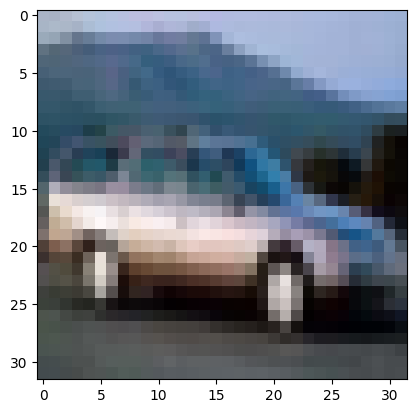

In [ ]:
plt.imshow(X_train[4])

## 2. Show a few training examples and its label

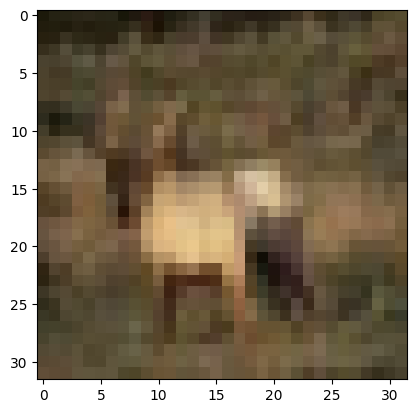

deer


In [ ]:
# List of label strings for CIFAR10
label_str = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#label_str we can get from keras cifar10 dataset

img_id = 3
image = X_train[img_id]
label = Y_train[img_id]

plt.imshow(image)
plt.show()
print(label_str[label[0]])

## 3. Convert label vectors into one-hot encodings

In [ ]:
num_classes=10
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [ ]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## 4. Define the CNN model

We can add convolutional layers using the Conv2D class and max pooling layer using the MaxPooling2D class. So this CNN model contains:
*   2 convolutional layers (each with 32 3x3 filters)
*   1 max pooling layer with a 2x2 filter
*   The resulting tensor is flattened into a vector
*   The flattened vector is put through an MLP with 1 hidden layer (128 hidden nodes)



In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size =(3, 3), input_shape=(32, 32, 3),activation='relu'))
model.add(Conv2D(32, kernel_size =(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))  #Activation is softmax when there are multiple outputs

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               802944    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

## 5. Compile the model

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

## 6. Train the model

In [ ]:
batch_size = 128
epochs = 15
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
352/352 [==============================] - 5s 9ms/step - loss: 1.4755 - accuracy: 0.4761 - val_loss: 1.2159 - val_accuracy: 0.5824
Epoch 2/15
352/352 [==============================] - 3s 8ms/step - loss: 1.1062 - accuracy: 0.6114 - val_loss: 1.0636 - val_accuracy: 0.6364
Epoch 3/15
352/352 [==============================] - 3s 7ms/step - loss: 0.9647 - accuracy: 0.6639 - val_loss: 0.9810 - val_accuracy: 0.6644
Epoch 4/15
352/352 [==============================] - 3s 7ms/step - loss: 0.8719 - accuracy: 0.6981 - val_loss: 0.9550 - val_accuracy: 0.6750
Epoch 5/15
352/352 [==============================] - 3s 7ms/step - loss: 0.8058 - accuracy: 0.7211 - val_loss: 0.9098 - val_accuracy: 0.6948
Epoch 6/15
352/352 [==============================] - 3s 8ms/step - loss: 0.7276 - accuracy: 0.7481 - val_loss: 0.9306 - val_accuracy: 0.6840
Epoch 7/15
352/352 [==============================] - 3s 8ms/step - loss: 0.6675 - accuracy: 0.7682 - val_loss: 0.9027 - val_accuracy: 0.7032
Epoch 

## 7. Evaluate the trained model on test set

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
test_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 1.4882 - accuracy: 0.6625


0.6625000238418579